## Different imports and setup

In [241]:
# Standard import
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [242]:
# Machine learning libraries
from tensorflow import keras
import tensorflow as tf

In [243]:
from Tools import Plot
from Tools import Custom_models
from Tools import Helpers

## Set the seeds and extract the testing set

In [244]:
# Set the seed for reproducibility
seed = 6
np.random.seed(seed)
tf.random.set_seed(seed*2)

In [245]:
_, _, features_test, labels_test = Helpers.Load_and_split_1D('Data/tanh_k50.txt', seed, ratio=0.9)

## Load a model

In [311]:
model_name = 'Saved_models/Depth_study/batch_32-depth_3-iter_2'
model = keras.models.load_model(model_name)

## Assess the performance of the model on the testing set

In [312]:
mse = Helpers.MSE(model, features_test, labels_test)
mae = Helpers.MAE(model, features_test, labels_test)
maae = Helpers.MaAE(model, features_test, labels_test)
print(f'The MSE is : {mse:.4e}')
print(f'The MAE is : {mae:.4e}')
print(f'The MaAE is : {maae:.4e}')

The MSE is : 4.5581e-05
The MAE is : 3.3631e-03
The MaAE is : 4.4301e-02


In [271]:
sorting = np.argsort(features_test)
features_testing = features_test[sorting]
labels_testing = labels_test[sorting]

prediction = model.predict(features_testing)
prediction = np.ravel(prediction)

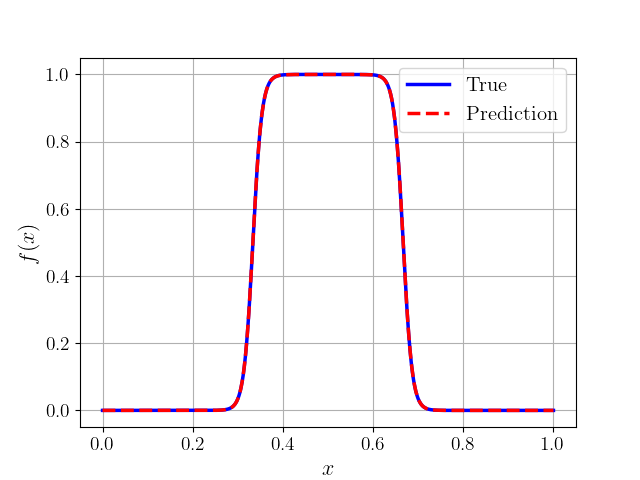

In [272]:
save = False
name = 'Figures/Deep_depth_study/Deep_depth_study_best_approximation_zoom.pdf'

plt.figure()
plt.plot(features_testing, labels_testing, 'b-', label='True')
plt.plot(features_testing, prediction, 'r--', label='Prediction')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid()
#plt.xlim([0.3, 0.38])
if (save):
    plt.savefig(name, bbox_inches='tight')
plt.show()

## Print a summary of the loaded model

In [313]:
model.sequence.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 75)                150       
_________________________________________________________________
dense2 (Dense)               (None, 75)                5700      
_________________________________________________________________
dense3 (Dense)               (None, 75)                5700      
_________________________________________________________________
dense4 (Dense)               (None, 1)                 76        
Total params: 11,626
Trainable params: 11,626
Non-trainable params: 0
_________________________________________________________________


## Extract layers and weights of the model

In [218]:
layer1 = model.get_layer(name='dense1')
layer2 = model.get_layer(name='conv')
layer3 = model.get_layer(name='dense2')

In [219]:
weights1 = layer1.get_weights()
weights2 = layer2.get_weights()
weights3 = layer3.get_weights()

In [220]:
core1 = weights1[0].flatten()
bias1 = weights1[1].flatten()
core2 = weights2[0].flatten()
bias2 = weights2[1].flatten()
core3 = weights3[0].flatten()
bias3 = weights3[1].flatten()

## Compute the basis functions created by the model

In [277]:
layers = [model.sequence.get_layer(name=f'dense{i}') for i in range(1,62)]

In [278]:
# Computes the interval on which evaluate the basis functions and the real solution
x = np.linspace(0, 1, 10000)
y = 1/2*(1 + np.tanh(50*(x-1/3))) - 1/2*(1 + np.tanh(50*(x-2/3)))

In [222]:
# First layer basis functions
basis_func_layer1 = Helpers.basis_functions_layer(x, [layer1])

In [223]:
# Second layer basis functions
basis_func_layer2 = Helpers.basis_functions_conv_layer(x, layer1, layer2)

In [ ]:
layers = [model.sequence.get_layer(name=f'dense{i}') for i in range(1,62)]

In [282]:
basis_func_layer1 = Helpers.basis_functions_layer(x, [layers[0]])
basis_func_layer2 = Helpers.basis_functions_layer(x, layers[0:2])
basis_func_layer5 = Helpers.basis_functions_layer(x, layers[0:5])
basis_func_layer10 = Helpers.basis_functions_layer(x, layers[0:10])
basis_func_layer20 = Helpers.basis_functions_layer(x, layers[0:20])
basis_func_layer30 = Helpers.basis_functions_layer(x, layers[0:30])
basis_func_layer40 = Helpers.basis_functions_layer(x, layers[0:40])
basis_func_layer50 = Helpers.basis_functions_layer(x, layers[0:50])
basis_func_layer60 = Helpers.basis_functions_layer(x, layers[0:60])

## Visualize the basis functions

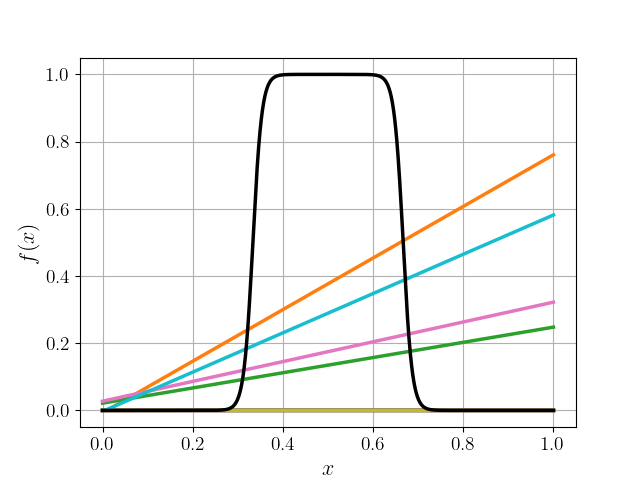

In [310]:
filename = 'Figures/Deep_depth_study/best_relu_layer_1.pdf'
save = False

# To visualize only one function each offset values
offset = 1

# To visualize the right layer
basis_func = basis_func_layer1

plt.figure()
for i in range(0, len(basis_func), offset):
    plt.plot(x, basis_func[i,:])
plt.plot(x, y, 'k-')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
#plt.ylim([-0.1, 1.3])
plt.grid()
if save:
    plt.savefig(filename, bbox_inches='tight')
plt.show()

## Inspect raw weights

In [ ]:
print(bias2)

In [ ]:
print(core2)

In [ ]:
-bias1/core1 < 1

In [292]:
plt.close('all')